In [2]:
import os
from PIL import Image
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib as plt
import face_recognition as fr
import cv2


In [3]:
# Defina o caminho para a pasta contendo as imagens
image_folder_train = r'D:\FIAP\2024\1_Semestre\AI ENGENEERING, COGNITIVE AND SEMANTIC COMPUTATION & IOT\CP\KenAI\Reconhecimento_pessoa\images\Larissa'
image_folder_test = r'D:\FIAP\2024\1_Semestre\AI ENGENEERING, COGNITIVE AND SEMANTIC COMPUTATION & IOT\CP\KenAI\Reconhecimento_pessoa\images\todos'

# Obtenha uma lista de todos os arquivos na pasta
image_files_train = [f for f in os.listdir(image_folder_train) if os.path.isfile(os.path.join(image_folder_train, f))]
image_files_test = [f for f in os.listdir(image_folder_test) if os.path.isfile(os.path.join(image_folder_test, f))]



In [6]:
# Função para carregar e preprocessar as imagens usando face encodings
def load_and_preprocess_images(image_folder, image_files):
    encodings = []
    for image_file in image_files:
        image_path = os.path.join(image_folder, image_file)
        image = fr.load_image_file(image_path)  # Carrega a imagem
        face_locations = fr.face_locations(image)  # Encontra as localizações dos rostos
        if face_locations:
            face_encoding = fr.face_encodings(image, known_face_locations=face_locations)[0]
            encodings.append(face_encoding)
    encodings = np.array(encodings)
    return encodings


In [7]:
x_train = load_and_preprocess_images(image_folder_train, image_files_train)
x_test = load_and_preprocess_images(image_folder_test, image_files_test)

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\FIAP\\2024\\1_Semestre\\AI ENGENEERING, COGNITIVE AND SEMANTIC COMPUTATION & IOT\\CP\\KenAI\\Reconhecimento_pessoa\\images\\Larissa\\beauty_20210113230239.jpg'

In [ ]:
print(x_test)

NameError: name 'x_test' is not defined

In [80]:
# Criar labels para treino e teste e converter para categórico
labels_train = list(range(len(x_train)))
labels_test = list(range(len(x_test)))
num_classes = len(set(labels_train))  # Assume o mesmo número de classes para ambos conjuntos

y_train = to_categorical(labels_train, num_classes=num_classes)
y_test = to_categorical(labels_test, num_classes=num_classes)

In [81]:
# Definindo o modelo
modelo = Sequential()

modelo.add(Dense(128, activation='relu', input_shape=(128,)))  # Tamanho do encoding do rosto
modelo.add(BatchNormalization())
modelo.add(Dropout(0.5))

modelo.add(Dense(64, activation='relu'))
modelo.add(BatchNormalization())
modelo.add(Dropout(0.5))

modelo.add(Dense(num_classes, activation='softmax'))

modelo.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

modelo.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 386)            │        25,090 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,626 (197.76 KB)

 Trainable params: 50,242 (196.26 KB)

 Non-trainable params: 384 (1.50 KB)

In [82]:
# Treinar o modelo
history = modelo.fit(x_train, y_train, 
                     epochs=15, 
                     validation_data=(x_test, y_test))
#definir teste com data set com pessoas variadas para teste

Epoch 1/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.0018 - loss: 6.2292 - val_accuracy: 0.0141 - val_loss: 5.9543
Epoch 2/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: 6.2424 - val_accuracy: 0.0141 - val_loss: 5.9582
Epoch 3/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 6.0443 - val_accuracy: 0.0141 - val_loss: 5.9615
Epoch 4/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0082 - loss: 5.9493 - val_accuracy: 0.0000e+00 - val_loss: 5.9637
Epoch 5/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0048 - loss: 5.9538 - val_accuracy: 0.0000e+00 - val_loss: 5.9650
Epoch 6/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0223 - loss: 5.8086 - val_accuracy: 0.0000e+00 - val_loss: 5.9661
Epoch 7/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0131 - loss: 5.7143 - val_accuracy: 0.0000e+00 - val_loss: 5.9681
Epoch 8/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0302 - loss: 5.7193 - val_acc

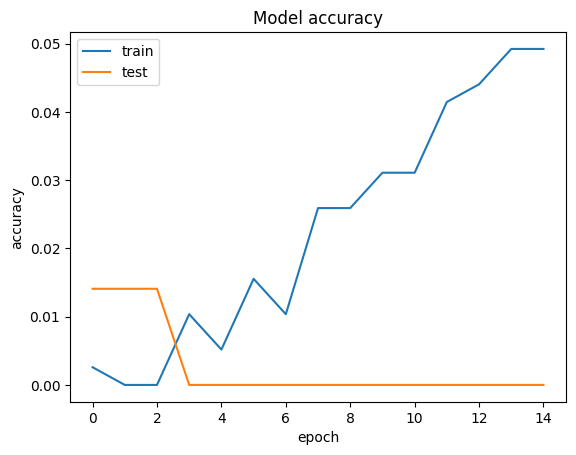

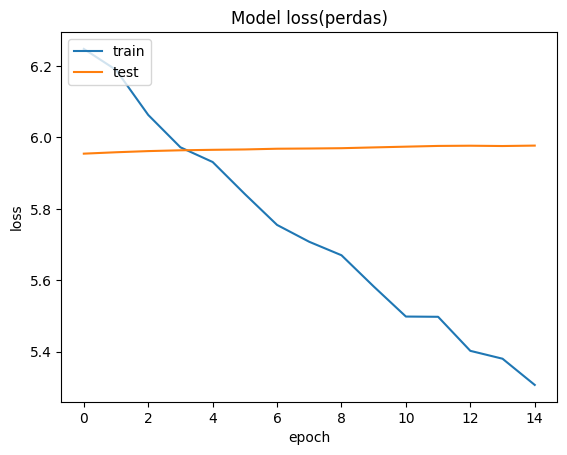

In [83]:
import matplotlib.pyplot as plt

# Função para plotar o histórico de treinamento
def plot_history(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss(perdas)')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
 

plot_history(history)

# Salvar o modelo treinado
modelo.save(r'D:\FIAP\2024\1_Semestre\AI ENGENEERING, COGNITIVE AND SEMANTIC COMPUTATION & IOT\CP\KenAI\Reconhecimento_pessoa\modelo.h5')